# Plot data with histograms

In [1]:
import json

flnm = './data/llama3_metrics.json'
# Open and read the JSON file
with open(flnm, 'r', encoding='utf-8') as file:
    data = json.load(file)

# Format data like this: "category":<Nome LLM>, "total":<Somma documenti Usati> in Tutti i K, "diff":{}
# [t.results.AI.metadata.source_type for t in test_output_dicts]
# data = [
#     {"category": "theory", "total": 10, "diff": {"easy": 9, "medium": 1, "hard": 0}},
#     ...
# ]
def remap_data(run_output_dict:dict):
    plot_data =  []

    unique_list_of_model_names = list(set([test_output_dict["model_name"] for test_output_dict in run_output_dict]))

    # for metric, settings in metrics.items():
    label_name = "LLM_judge"
    for model_name in unique_list_of_model_names:
        print(f"===> [PLOT] MODEL {model_name} <===")
        # Get all the test outputs for the current model
        test_output_dicts = [test_output_dict for test_output_dict in run_output_dict if test_output_dict["model_name"] == model_name]

        for test_output_dict in test_output_dicts:
            X, Y = [],[]
            # The ith element of X is the number of documents retrieved for the ith test output with the average metric
            # Append the number of documents retrieved
            K_curr = test_output_dict["K_documents_retrieved"]

            # Get the mean metric for the current test output
            results = test_output_dict["results"]
            for i, res_obj in enumerate(results):
              # print(res_obj["AI"].keys())
              X.append(i)
              Y.append(res_obj["AI"]["judge_llm"])

            plot_data.append({"model_name":model_name, "K":K_curr, "X":X, "Y":Y})

    return plot_data

data = remap_data(data)
print(len(data)) # 13

print(data[0]["X"]) # [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
print(list(len(data[i]["X"]) for i in range(len(data)))) # [101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101]

print(data[0]["Y"]) # [4, 4, 4, 5, 3, 4, 4, 4, 3, 3, 3, 3, 2, 5, 3, 3, 2, 3, 3, 2, 2, 3, 5, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3, 3, 3, 5, 2, 2, 2, 1, 2, 1, 1, 1, 3, 4, 3, 3, 3, 4, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 4, 3, 3, 3, 1, 3, 4, 3, 4, 3, 3, 4, 2, 4, 3, 2, 2, 4, 3, 5, 4, 4, 2, 3, 3, 5, 4, 4, 3, 3, 2, 1, 3, 2, 4, 3]
print(list(len(data[i]["Y"]) for i in range(len(data)))) # [101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101]

===> [PLOT] MODEL Llama-3-8B-16K.Q4_0.gguf <===
13
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
[101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101]
[4, 4, 4, 5, 3, 4, 4, 4, 3, 3, 3, 3, 2, 5, 3, 3, 2, 3, 3, 2, 2, 3, 5, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2, 3, 3, 3, 5, 2, 2, 2, 1, 2, 1, 1, 1, 3, 4, 3, 3, 3, 4, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 4, 3, 3, 3, 1, 3, 4, 3, 4, 3, 3, 4, 2, 4, 3, 2, 2, 4, 3, 5, 4, 4, 2, 3, 3, 5, 4, 4, 3, 3, 2, 1, 3, 2, 4, 3]
[101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101, 101]


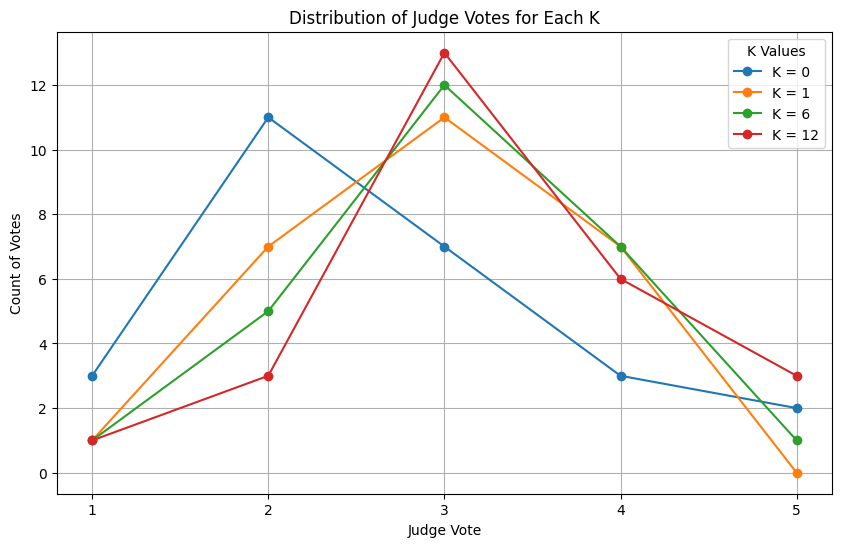

In [2]:
import matplotlib.pyplot as plt
from collections import defaultdict, Counter

def plot_distribution(data, skip_interval=4):
    """
    Plots the distribution of judge votes (1 to 5) for each K value.
    Only every skip_interval-th vote is considered from each entry's "Y" list.

    Parameters:
        data (list): List of dictionaries with keys "K" and "Y". "Y" is a list of votes.
        skip_interval (int): Interval at which votes are considered.
    """
    # Create a dictionary to store vote counts for each K.
    distribution_by_K = defaultdict(Counter)

    # Process each entry and count only every skip_interval-th vote.
    for entry in data:
        K = entry["K"]
        # Apply skip_interval to the list of votes.
        votes = entry["Y"][::skip_interval]
        for vote in votes:
            distribution_by_K[K][vote] += 1

    # The x-axis will be the judge vote values (from 1 to 5)
    vote_values = [1, 2, 3, 4, 5]

    plt.figure(figsize=(10, 6))

    # Plot a curve for each K value.
    for K, counter in distribution_by_K.items():
        # Get the count for each vote value, defaulting to 0 if absent.
        counts = [counter.get(vote, 0) for vote in vote_values]
        plt.plot(vote_values, counts, marker='o', label=f"K = {K}")

    plt.xlabel("Judge Vote")
    plt.ylabel("Count of Votes")
    plt.title("Distribution of Judge Votes for Each K")
    plt.legend(title="K Values")

    # Maintain y-ticks as [1, 2, 3, 4, 5]
    plt.xticks([1, 2, 3, 4, 5])

    plt.grid(True)
    plt.show()

# Example usage:
# Assuming your data is something like:
# data = [
#     {"K": 3, "Y": [1, 2, 3, 3, 4, 5], "model_name": "Model A", "X": [0, 1, 2, 3, 4, 5]},
#     {"K": 5, "Y": [2, 2, 3, 4, 4, 4], "model_name": "Model B", "X": [0, 1, 2, 3, 4, 5]},
#     # ... more entries ...
# ]
# You can call the function as follows:
data2 = [data[i] for i in [0,1,6,12]]
plot_distribution(data2)


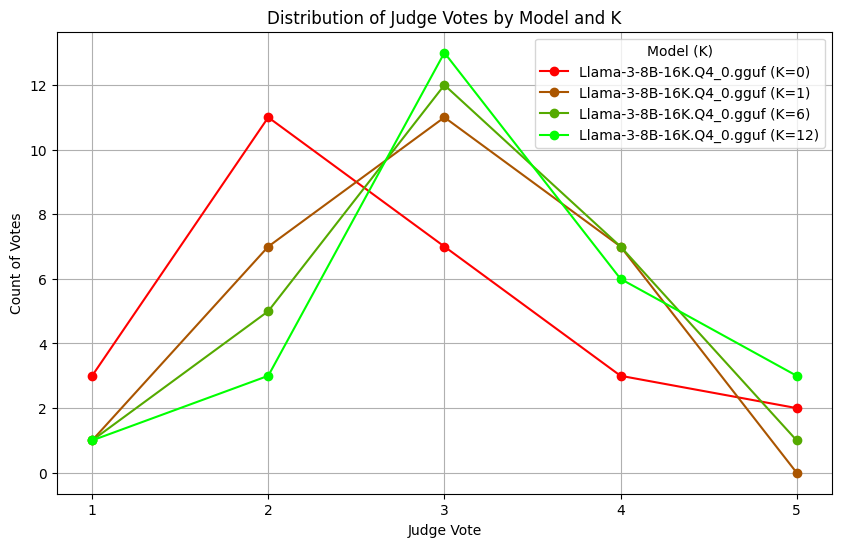

In [3]:
import matplotlib.pyplot as plt
from collections import defaultdict, Counter

def plot_distribution(data, skip_interval=4):
    """
    Plots the distribution of judge votes (1 to 5) for each (K, model) pair.
    Only every skip_interval-th vote is considered from each entry's "Y" list.

    The x-axis is the vote (1 to 5) and the y-axis is the count of votes.
    The curve for the lowest K is colored pure red and the highest K is pure green.
    Other curves are colored with an interpolation between red and green.

    Parameters:
        data (list): List of dictionaries with keys "K", "Y", and "model_name".
                     "Y" is a list of votes (assumed integers from 1 to 5).
        skip_interval (int): Use every skip_interval-th vote.
    """
    # Group vote counts by (K, model_name)
    distribution_by_key = defaultdict(Counter)

    for entry in data:
        K = entry["K"]
        model_name = entry.get("model_name", "Unknown Model")
        # Only take every skip_interval-th vote from Y
        votes = entry["Y"][::skip_interval]
        key = (K, model_name)
        for vote in votes:
            distribution_by_key[key][vote] += 1

    # x-axis values: judge vote values from 1 to 5.
    vote_values = [1, 2, 3, 4, 5]

    # Sort keys by K (ascending)
    sorted_keys = sorted(distribution_by_key.keys(), key=lambda k: k[0])
    n_lines = len(sorted_keys)

    plt.figure(figsize=(10, 6))

    # Plot each distribution curve.
    for idx, key in enumerate(sorted_keys):
        K, model_name = key
        counter = distribution_by_key[key]
        counts = [counter.get(vote, 0) for vote in vote_values]

        # Determine the color: interpolate between red (for lowest K) and green (for highest K).
        # If there's only one line, use pure green.
        if n_lines > 1:
            fraction = idx / (n_lines - 1)
        else:
            fraction = 1.0
        # Red is (1,0,0) and green is (0,1,0), so interpolated color:
        color = (1 - fraction, fraction, 0)

        label = f"{model_name} (K={K})"
        plt.plot(vote_values, counts, marker='o', color=color, label=label)

    plt.xlabel("Judge Vote")
    plt.ylabel("Count of Votes")
    plt.title("Distribution of Judge Votes by Model and K")
    plt.xticks([1, 2, 3, 4, 5])
    plt.legend(title="Model (K)", loc="best")
    plt.grid(True)
    plt.show()


# Example usage:
# Assuming your data is something like:
# data = [
#     {"K": 3, "Y": [1, 2, 3, 3, 4, 5], "model_name": "Model A", "X": [0, 1, 2, 3, 4, 5]},
#     {"K": 5, "Y": [2, 2, 3, 4, 4, 4], "model_name": "Model B", "X": [0, 1, 2, 3, 4, 5]},
#     # ... more entries ...
# ]
# You can call the function as follows:
data2 = [data[i] for i in [0,1,6,12]]
plot_distribution(data2)